In [1]:
import random
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Mac OS의 경우와 그 외 OS의 경우로 나누어 설정
import os
if os.name == 'posix':
    plt.rc("font", family="AppleGothic")
else:
    plt.rc("font", family="Malgun Gothic")

In [3]:
# 각 퀵정렬에 사용할 메서드가 들어있는 QuickSort 클래스
class QuickSort:
    
    # QuickSort 객체를 생성할 때 비교 연산의 횟수를 구하기 위해 self.count를 0으로 초기화한다.
    def __init__(self):
        self.count = 0
        
    # 각 퀵정렬의 버전의 비교 연산의 횟수를 구한 후에 다시 self.count를 0으로 초기화하는 메서드
    def initCount(self):
        self.count = 0
        
    # 비교 연산이 발생할 때 비교 횟수만큼 self.count에 더하는 메서드
    def plusCount(self, count):
        self.count += count
        
    # 각 퀵정렬이 끝날 때마다 구한 비교 연산의 횟수를 return하고 초기화하는 메서드
    def popCount(self):
        rv = self.count # return 값
        self.initCount() # self.count 초기화
        return rv

    # 배열의 값을 swap하기 위한 메서드
    def swap(self, arr, i, j):
        arr[i], arr[j] = arr[j], arr[i]

    # 퀵정렬의 partition 메서드
    def partition(self, arr, left, right):
        pivot = arr[left]
        low, high = left, right + 1
        while True:
            
            while True:
                # 아래 if문에서 low <= right과 arr[low] < pivot 총 2번의 비교 연산 카운트
                self.plusCount(2)
                low += 1
                if not (low <= right and arr[low] < pivot):
                    break
                    
            while True:
                # 아래 if문에서 high >= left과 arr[high] > pivot 총 2번의 비교 연산 카운트
                self.plusCount(2)
                high -= 1
                if not (high >= left and arr[high] > pivot):
                    break
                    
            # 아래 if문에서 low < high 총 1번의 비교 연산 카운트
            self.plusCount(1)
            if low < high:
                self.swap(arr, low, high)
            else:
                break
        self.swap(arr, left, high)
        return high
        
    # Randomized QuickSort를 위한 randomizedPartition 메서드
    def randomizedPartition(self, arr, left, right):
        # pivot으로 사용할 원소의 index 난수로 초기화
        randomIdx = left + random.randint(0, right - left)
        # 이후 partition 메서드에서 pivot으로 사용할 원소인 arr[left]와 arr[randomIdx] swap
        self.swap(arr, left, randomIdx)
        return self.partition(arr, left, right)
    
    # while문을 사용한 Iterative Quicksort
    def iterativeQuickSort(self, arr):
        left, right = 0, len(arr) - 1
        # 사용할 stack 초기화
        stack = []
        # stack에 left와 right push
        stack.append((left, right))
        
        while stack:
            # stack의 가장 나중에 push된 left, right값 pop
            left, right = stack.pop()
            # 아래 if문에서 left < right 총 1번의 비교 연산 카운트
            self.plusCount(1)
            if left < right:
                pivotIdx = self.partition(arr, left, right)
                stack.append((pivotIdx + 1, right))
                stack.append((left, pivotIdx - 1))

    # 자기 호출 방식을 사용한 Recursive (Devide & Conquer) Quicksort
    def recursiveQuickSort(self, arr, left, right):
        # 아래 if문에서 left < right 총 1번의 비교 연산 카운트
        self.plusCount(1)
        if left < right:
            pivot = self.partition(arr, left, right)
            self.recursiveQuickSort(arr, left, pivot - 1)
            self.recursiveQuickSort(arr, pivot + 1, right)
    
    # pivot 요소를 랜덤으로 정하는 방식을 사용한 Randomized Quicksort
    def randomizedQuickSort(self, arr, left, right):
        # 아래 if문에서 left < right 총 1번의 비교 연산 카운트
        self.plusCount(1)
        if left < right:
            pivot = self.randomizedPartition(arr, left, right)
            self.randomizedQuickSort(arr, left, pivot - 1)
            self.randomizedQuickSort(arr, pivot + 1, right)

In [4]:
print('퀵정렬이 정상적으로 잘 동작하는지 확인하기 위한 테스트')
quickSortForTest = QuickSort()
arr = [random.randint(1, 10) for _ in range(10)]
print('입력 배열:', arr)

# Iterative Quicksort Test
arrCopy = arr.copy()
quickSortForTest.iterativeQuickSort(arrCopy)
print('iterativeQuickSort:', arrCopy)

# Recursive Quicksort Test
arrCopy = arr.copy()
quickSortForTest.recursiveQuickSort(arrCopy, 0, len(arr) - 1)
print('recursiveQuickSort:', arrCopy)

# Randomized Quicksort Test
arrCopy = arr.copy()
quickSortForTest.randomizedQuickSort(arrCopy, 0, len(arr) - 1)
print('randomizedQuickSort:', arrCopy)

퀵정렬이 정상적으로 잘 동작하는지 확인하기 위한 테스트
입력 배열: [2, 7, 1, 6, 1, 3, 2, 3, 8, 2]
iterativeQuickSort: [1, 1, 2, 2, 2, 3, 3, 6, 7, 8]
recursiveQuickSort: [1, 1, 2, 2, 2, 3, 3, 6, 7, 8]
randomizedQuickSort: [1, 1, 2, 2, 2, 3, 3, 6, 7, 8]


In [5]:
# 입력 데이터
dataSet = {}
dataSize = [10 ** (2 * (i + 1)) for i in range(3)]

# 원래 과제의 조건에 따르면 10의 8승을 실행해야 하지만
dataSize[2] = 10 ** 6 # 시간이 너무 오래 걸리기 때문에 10의 6승까지 테스트했습니다.

for i in dataSize:
    dataSet[i] = []
    for j in range(30):
        arr = [random.randint(1, i) for _ in range(i)]
        dataSet[i].append(arr)

In [6]:
compCounts = {'size':[], 'iterative':[], 'recursive':[], 'randomized':[]}
quickSort = QuickSort()

for size in dataSet.keys():
    for j in range(len(dataSet[size])):
        arr = dataSet[size][j]
        arrCopy = arr.copy()
        
        # Iterative Quicksort
        quickSort.iterativeQuickSort(arrCopy)
        iterative_cnt = quickSort.popCount()
        arrCopy = arr.copy()

        # Recursive Quicksort
        quickSort.recursiveQuickSort(arrCopy, 0, len(arr) - 1)
        recursive_cnt = quickSort.popCount()
        arrCopy = arr.copy()

        # Randomized Quicksort
        quickSort.randomizedQuickSort(arrCopy, 0, len(arr) - 1)
        randomized_cnt = quickSort.popCount()
        arrCopy = arr.copy()
        
        # DataFrame으로 변경하기 위한 데이터 compCounts에 append
        compCounts['size'].append(size)
        compCounts['iterative'].append(iterative_cnt)
        compCounts['recursive'].append(recursive_cnt)
        compCounts['randomized'].append(randomized_cnt)

In [9]:
print('입력 데이터에 대한 각 퀵정렬의 비교 연산 횟수')

df = pd.DataFrame(compCounts)
n = 3

# df1, df2,.., dfn으로 분리
for i in range(0, (n - 1) * len(dataSet[dataSize[0]]) + 1, 30):
    globals()['df{}'.format((i // 30) + 1)] = df[i:i+30]
    
for i, size in enumerate(dataSet.keys()):
    print('\n입력 데이터의 크기가 %d인 경우' % size)
    print(globals()['df{}'.format(i + 1)].reset_index(drop=True).drop('size', axis=1))

입력 데이터에 대한 각 퀵정렬의 비교 연산 횟수

입력 데이터의 크기가 100인 경우
    iterative  recursive  randomized
0        2183       2183        1838
1        1947       1947        1721
2        1720       1720        1744
3        1777       1777        1818
4        1728       1728        1710
5        1840       1840        1963
6        1796       1796        1775
7        1659       1659        1750
8        1778       1778        1690
9        1675       1675        1929
10       1830       1830        1845
11       1802       1802        1641
12       1748       1748        1931
13       1690       1690        1859
14       1595       1595        1800
15       1675       1675        1727
16       1698       1698        2003
17       1947       1947        1682
18       1694       1694        1679
19       1739       1739        1761
20       1714       1714        1670
21       1699       1699        1791
22       1683       1683        1712
23       1734       1734        1843
24       1770       1770   

In [10]:
# 각 알고리즘의 비교 연산 횟수의 평균 groupby
meanCounts = df.groupby('size').mean()
display(meanCounts)

,iterative,recursive,randomized
size,,,
100,1.773267e+03,1.773267e+03,1.799867e+03
10000,3.807561e+05,3.807561e+05,3.765165e+05
1000000,5.755306e+07,5.755306e+07,5.729030e+07


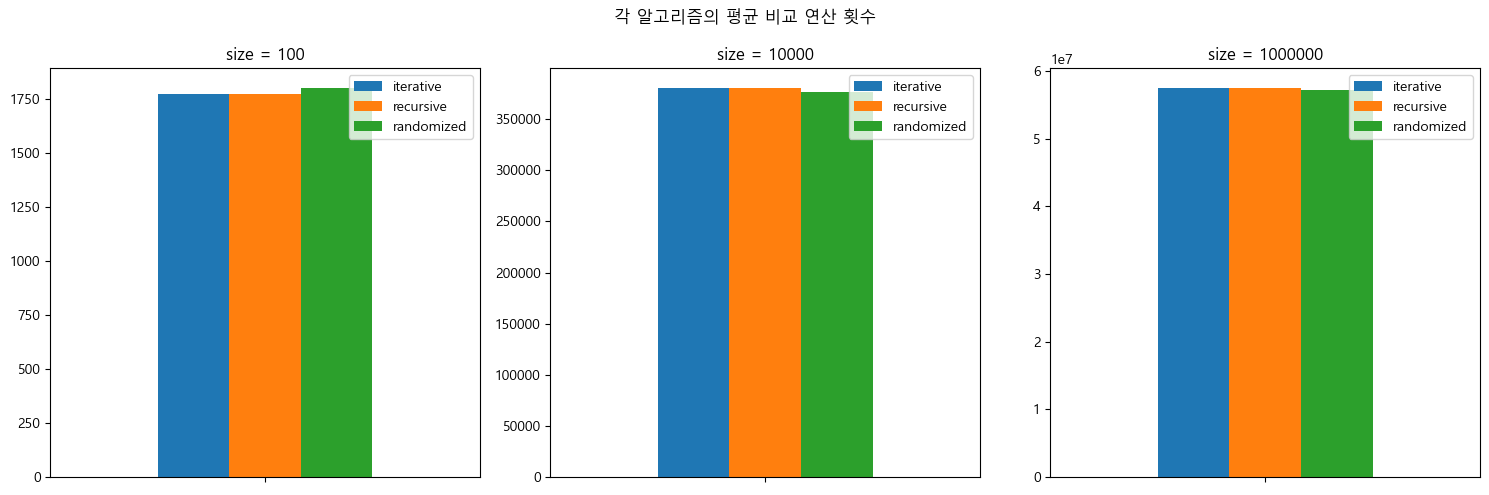

In [11]:
meanCounts = meanCounts.reset_index()
if len(dataSet) == 1:
    plt.figure(figsize=(5,5))
    size = list(dataSet.keys())[0]
    meanCounts[meanCounts['size'] == size].plot(x='size', y=['iterative', 'recursive', 'randomized'], kind='bar')
    plt.title('Average number of comparison operations for each algorithm\nSize = %d' % size)
    plt.xlabel('Size = %d' % size)
    plt.xticks([])

else:
    fig, axes = plt.subplots(nrows=1, ncols=len(dataSet), figsize=(5 * len(dataSet), 5))
    fig.suptitle('각 알고리즘의 평균 비교 연산 횟수')
    for axIdx, size in enumerate(dataSet.keys()):
        meanCounts[meanCounts['size'] == size] \
        .plot(x='size', y=['iterative', 'recursive', 'randomized'], kind='bar', ax=axes[axIdx])
        axes[axIdx].set_title('size = %d' % size)
        axes[axIdx].set_xlabel('')
        axes[axIdx].set_xticklabels([])
    plt.tight_layout()
    
plt.show()